In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kimginam/Kaggle/DATA/multipleChoiceResponses.csv', encoding = "ISO-8859-1")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sal = pd.read_csv('/Users/kimginam/Kaggle/DATA/conversionRates.csv')

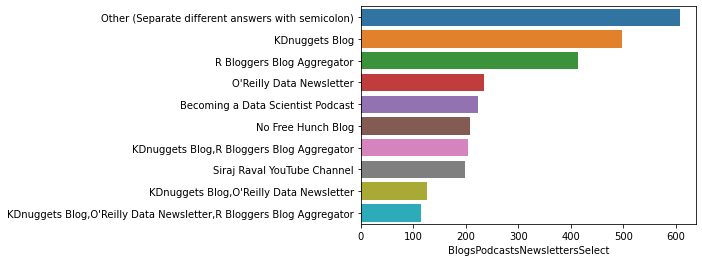

In [4]:
w = df['BlogsPodcastsNewslettersSelect'].value_counts().head(10)
sns.barplot(y=w.index, x= w)

In [5]:
job_factors = [
    x for x in df.columns if x.find('JobFactor') != -1]

In [6]:
jfdf = {}
for feature in job_factors:
    a = df[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

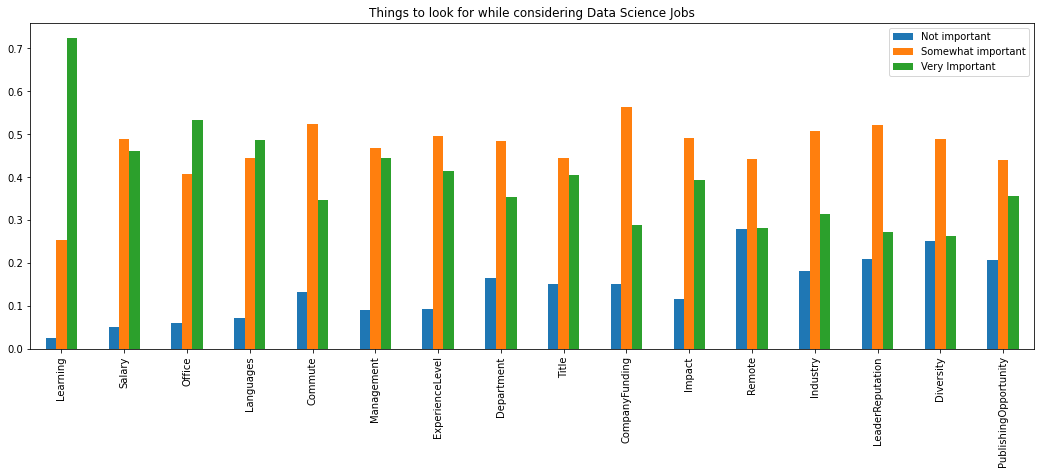

In [7]:
jfdf = pd.DataFrame(jfdf).transpose()

jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.show()

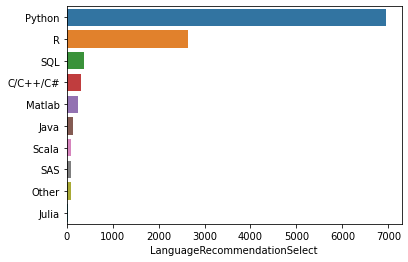

In [8]:
s = df['LanguageRecommendationSelect'].value_counts().head(10)
sns.barplot(y=s.index, x=s)

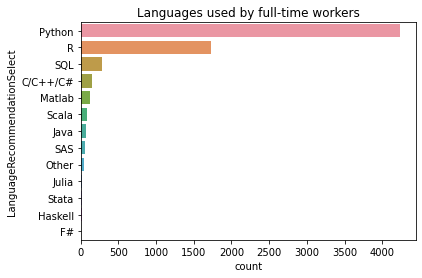

In [9]:
w = df[(df['EmploymentStatus'] == 'Employed full-time')]
plt.title("Languages used by full-time workers")
sns.countplot(y='LanguageRecommendationSelect', data = w, order=w['LanguageRecommendationSelect'].value_counts().head(15).index)

In [10]:
df['LearningPlatformSelect'] = df['LearningPlatformSelect'].astype('str').apply(lambda x : x.split(','))

s = df.apply(lambda x : pd.Series(x['LearningPlatformSelect']),axis =1).stack().reset_index(level = 1, drop=True)
s = s[s != 'nan'].value_counts().head(10)

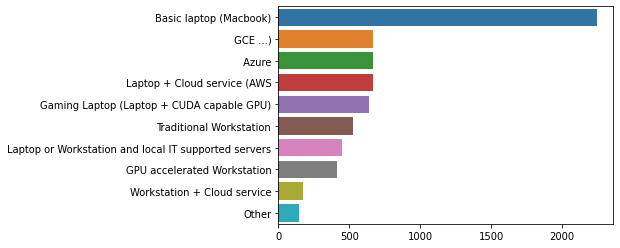

In [11]:
df['HardwarePersonalProjectsSelect'] = df['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

d = df.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
d = d[d != 'nan'].value_counts().head(15)
sns.barplot(y=d.index, x=d)

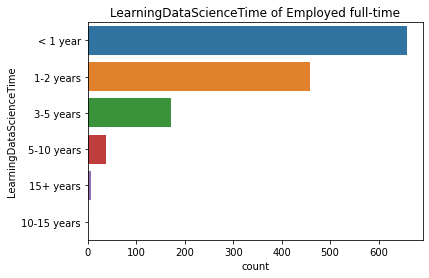

In [12]:
j = df[df['EmploymentStatus'] == 'Employed full-time']
plt.title('LearningDataScienceTime of Employed full-time')
sns.countplot(y=j.LearningDataScienceTime, order=j['LearningDataScienceTime'].value_counts().head(10).index)

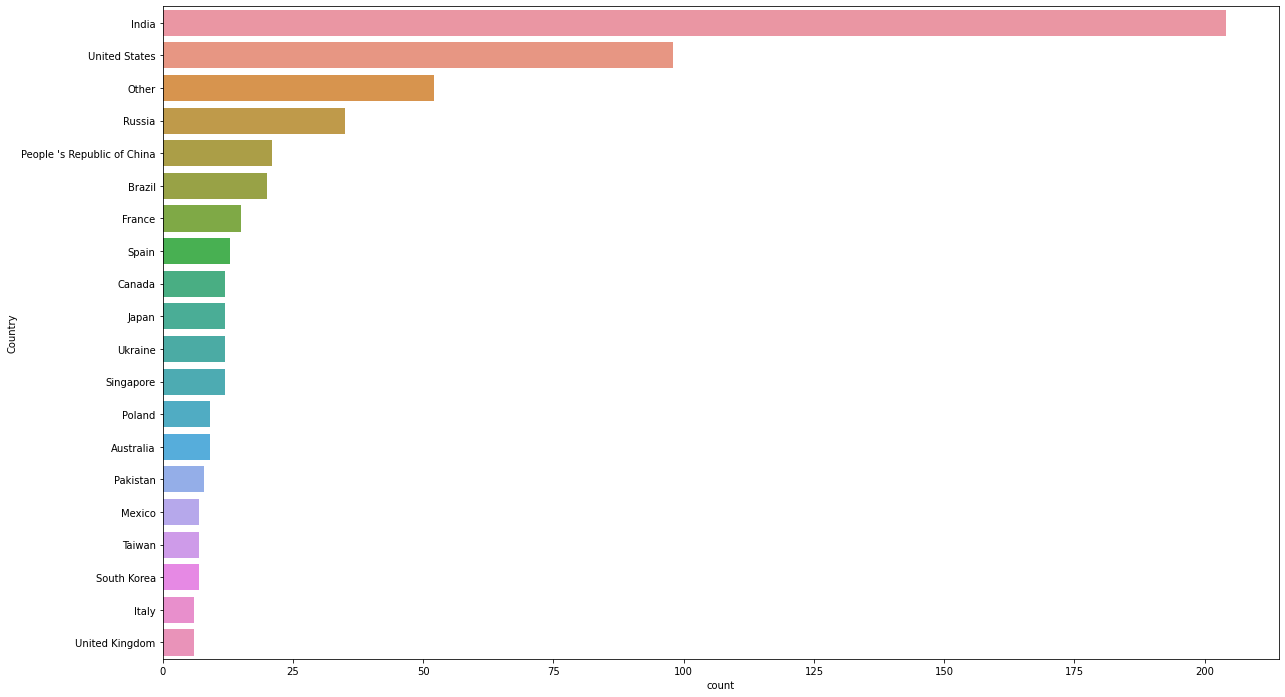

In [13]:
g = df[(df['EmploymentStatus'] == 'Employed full-time') & 
      (df['LearningDataScienceTime'] == '< 1 year')]
plt.figure(figsize=(20,12))
sns.countplot(y=g.Country, order=g['Country'].value_counts().head(20).index)

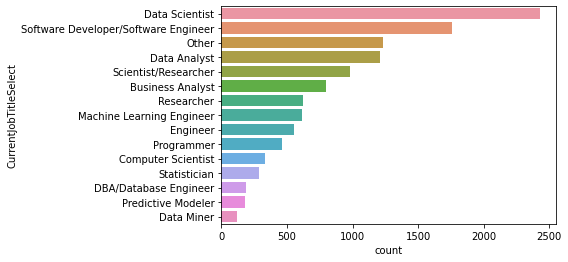

In [14]:
sns.countplot(y='CurrentJobTitleSelect', data=df, order=df['CurrentJobTitleSelect'].value_counts().head(15).index)

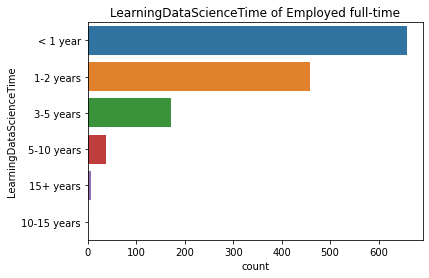

In [15]:
j = df[df['EmploymentStatus'] == 'Employed full-time']
plt.title('LearningDataScienceTime of Employed full-time')
sns.countplot(y=j.LearningDataScienceTime, order=j['LearningDataScienceTime'].value_counts().head(10).index)

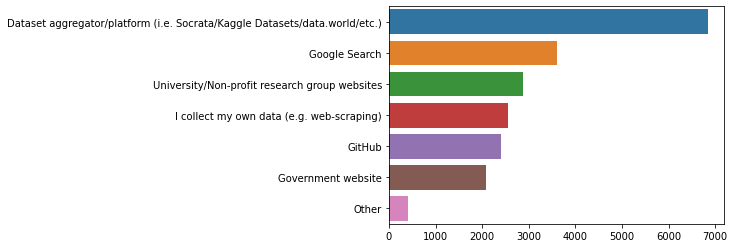

In [16]:
df['PublicDatasetsSelect'] = df['PublicDatasetsSelect'].astype('str').apply(lambda x : x.split(','))
f = df.apply(lambda x : pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)
f = f[f != 'nan'].value_counts().head(15)
pd.DataFrame(f)
sns.barplot(y=f.index, x=f)

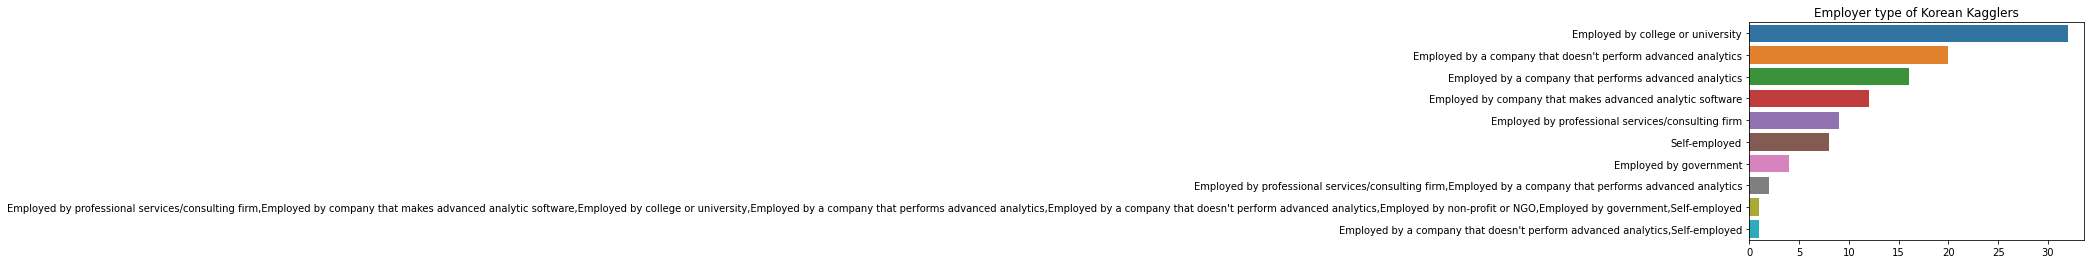

In [17]:
korea = df[df['Country'] == 'South Korea']

a = korea.apply(lambda x : pd.Series(x['CurrentEmployerType']), axis=1).stack().reset_index(level = 1, drop=True)
a = a[a != 'nan'].value_counts().head(10)

plt.title('Employer type of Korean Kagglers')
sns.barplot(y=a.index, x=a)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


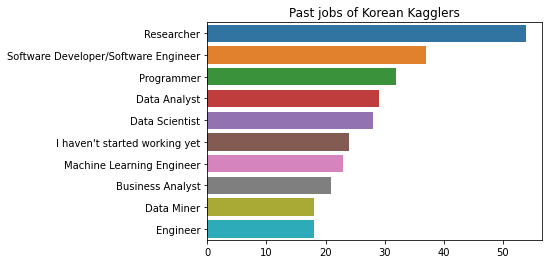

In [18]:
korean = df[df['Country'] == 'South Korea']

korean['PastJobTitlesSelect'] = korean['PastJobTitlesSelect'].astype('str').apply(lambda x : x.split(','))
q = korean.apply(lambda x : pd.Series(x['PastJobTitlesSelect']), axis=1).stack().reset_index(level=1, drop=True)
q = q[q != 'nan'].value_counts().head(10)

plt.title('Past jobs of Korean Kagglers')
sns.barplot(y=q.index, x=q)

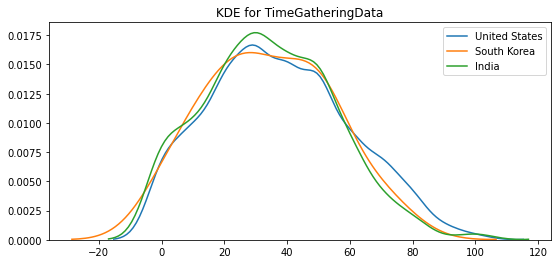

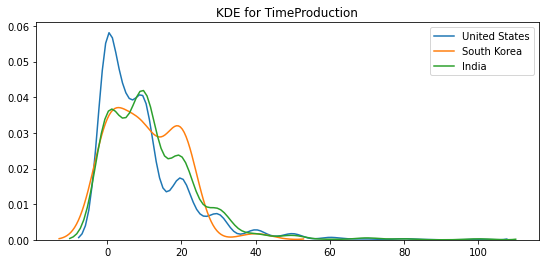

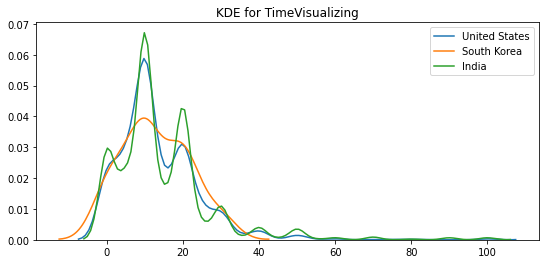

In [19]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))

    ax0 = sns.kdeplot(df[df['Country'] == 'United States'][feature].dropna(), label= 'United States')
    ax1 = sns.kdeplot(df[df['Country'] == 'South Korea'][feature].dropna(), label= 'South Korea')
    ax2 = sns.kdeplot(df[df['Country'] == 'India'][feature].dropna(), label= 'India')
    
kdeplot('TimeGatheringData')
kdeplot('TimeProduction')
kdeplot('TimeVisualizing')

In [20]:
a = [x for x in df.columns if x.find('Time') != -1]
a

['LearningDataScienceTime',
 'TimeSpentStudying',
 'EmployerMLTime',
 'WorkMethodsFrequencyTimeSeriesAnalysis',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'JobHuntTime']

In [21]:
i = {}
for feature in a:
    s = df[feature].value_counts().head(5)
    s = s/s.sum()
    i[feature[len('Time'):]] = s
i

{'ningDataScienceTime': < 1 year      0.482814
 1-2 years     0.361246
 3-5 years     0.124567
 5-10 years    0.024452
 15+ years     0.006920
 Name: LearningDataScienceTime, dtype: float64,
 'SpentStudying': 2 - 10 hours     0.576713
 11 - 39 hours    0.196872
 0 - 1 hour       0.183466
 40+              0.042949
 Name: TimeSpentStudying, dtype: float64,
 'oyerMLTime': 3-5 years             0.283197
 1-2 years             0.250728
 More than 10 years    0.169482
 Less than one year    0.161182
 Don't know            0.135411
 Name: EmployerMLTime, dtype: float64,
 'MethodsFrequencyTimeSeriesAnalysis': Often               0.374023
 Sometimes           0.291341
 Most of the time    0.283203
 Rarely              0.051432
 Name: WorkMethodsFrequencyTimeSeriesAnalysis, dtype: float64,
 'GatheringData': 30.0    0.228340
 50.0    0.224925
 20.0    0.210201
 40.0    0.206359
 10.0    0.130175
 Name: TimeGatheringData, dtype: float64,
 'ModelBuilding': 20.0    0.319046
 10.0    0.254379
 30.0 

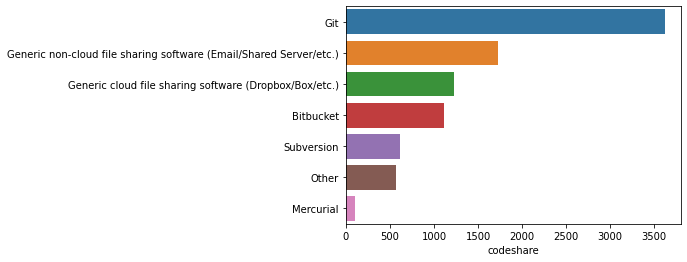

In [22]:
df['WorkCodeSharing'] = df['WorkCodeSharing'].astype('str').apply(lambda x : x.split(','))

s = df.apply(lambda x : pd.Series(x['WorkCodeSharing']), axis=1).stack().reset_index(level=1, drop=True)
s = s[s != 'nan']
s.name = 'codeshare'
s = pd.DataFrame(s)

q = s['codeshare'].value_counts().head(10)
sns.barplot(y=q.index, x=q)


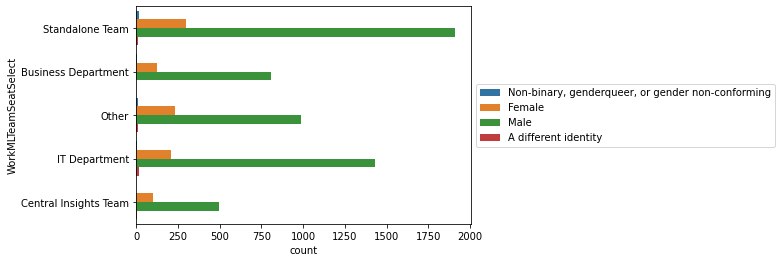

In [23]:
sns.countplot(y=df.WorkMLTeamSeatSelect, hue =df.GenderSelect).legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

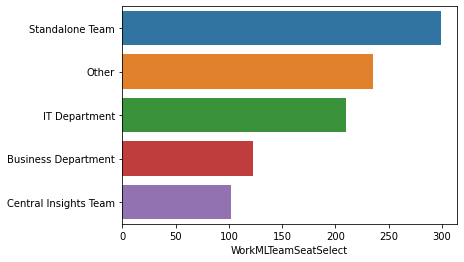

In [24]:
f = df[df['GenderSelect'] == 'Female']
f = f['WorkMLTeamSeatSelect'].value_counts().head(10)

sns.barplot(y=f.index, x=f)

In [25]:
sal = sal.drop(['Unnamed: 0'], axis=1)

In [26]:
df['CompensationAmount'] = df['CompensationAmount'].str.replace(',','')
df['CompensationAmount'] = df['CompensationAmount'].str.replace('-','')

salary = df[['CompensationAmount','CompensationCurrency']].dropna()

In [27]:
salary = salary.merge(sal, left_on ='CompensationCurrency', right_on='originCountry', how='left')

In [28]:
salary['salary'] = pd.to_numeric(salary['CompensationAmount'])* salary['exchangeRate']

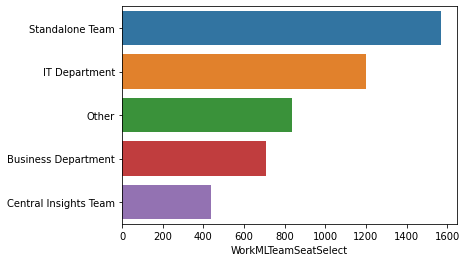

In [31]:
n = df[(df['GenderSelect']== 'Male') &
      (df['EmploymentStatus'] == 'Employed full-time')]
n = n['WorkMLTeamSeatSelect'].value_counts().head()

sns.barplot(y=n.index, x=n)